In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_data(filename):
    city_name = filename.split("/")[-1].split(".")
    city = city_name[0].split(",")[0].replace("+", " ").title()
    return (
        pd.read_csv(filename,
                    header=0,
                   usecols=[0, 1, 2],
                    names=["date_time", "min_temp", "max_temp"],
                   parse_dates=["date_time"],
                   index_col=["date_time"])
    .assign(city=city)
    )

In [3]:
df = load_data("/Users/ahmedabukar/Downloads/:/data/chicago,il.csv")
df

,min_temp,max_temp,city
date_time,,,
2018-12-11 00:00:00,1,-2,Chicago
2018-12-11 03:00:00,1,-2,Chicago
2018-12-11 06:00:00,1,-2,Chicago
2018-12-11 09:00:00,1,-2,Chicago
2018-12-11 12:00:00,1,-2,Chicago
...,...,...,...
2019-03-11 09:00:00,3,-2,Chicago
2019-03-11 12:00:00,3,-2,Chicago
2019-03-11 15:00:00,3,-2,Chicago


<Axes: >

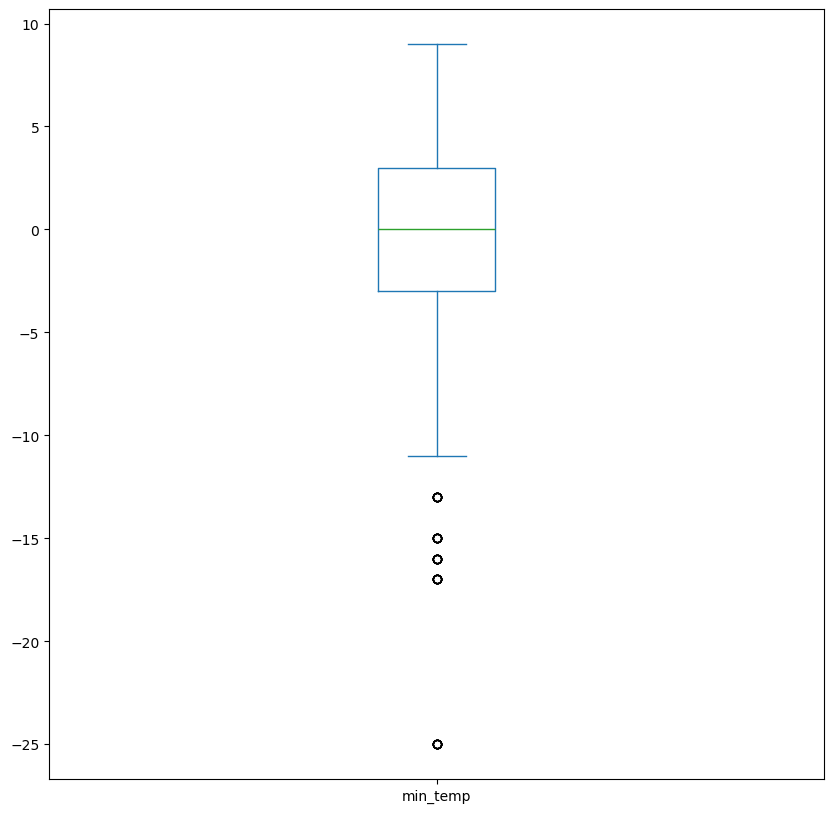

In [4]:
# create a box plot of chicago's minimun temperatur during this period?
(
    df["min_temp"]
    .plot.box(figsize=(10, 10))
)

In [5]:
# find the values of the dots that are represented in that boxplot?
(
    df["min_temp"].quantile(0.25)
    - 1.5
    * (df["min_temp"].quantile(0.75) 
       - df["min_temp"].quantile(0.25)) 
) 

-12.0

<Axes: >

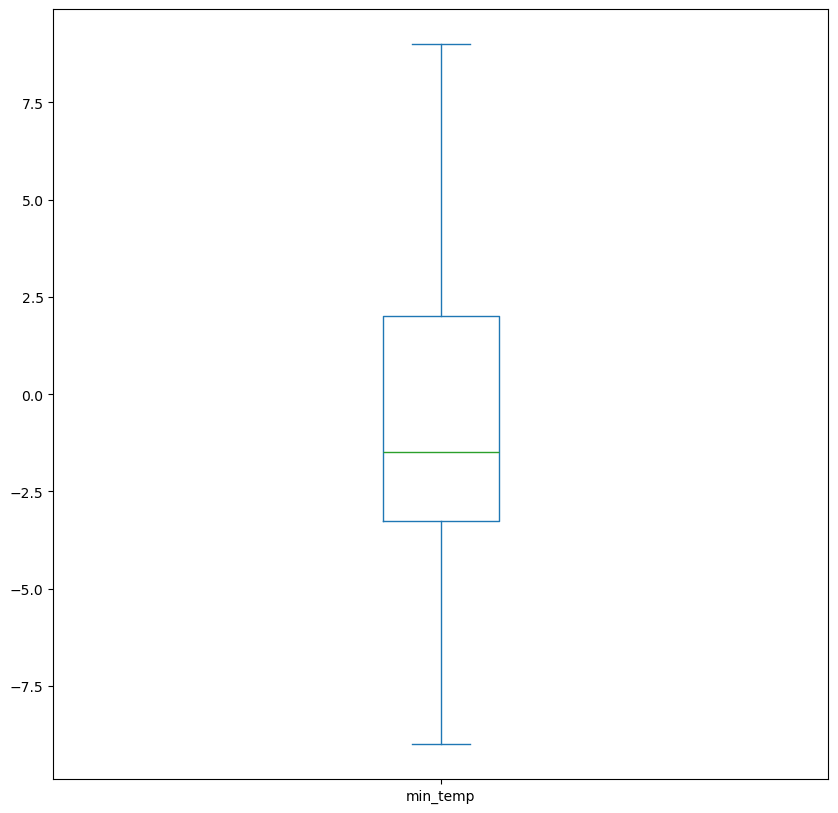

In [6]:
# create a boxplot of chicago's minimum temperature's in February?
(
    df
    .loc[df.index.month_name() == "February"]
    ["min_temp"]
    .plot.box(figsize=(10, 10))
)

<Axes: >

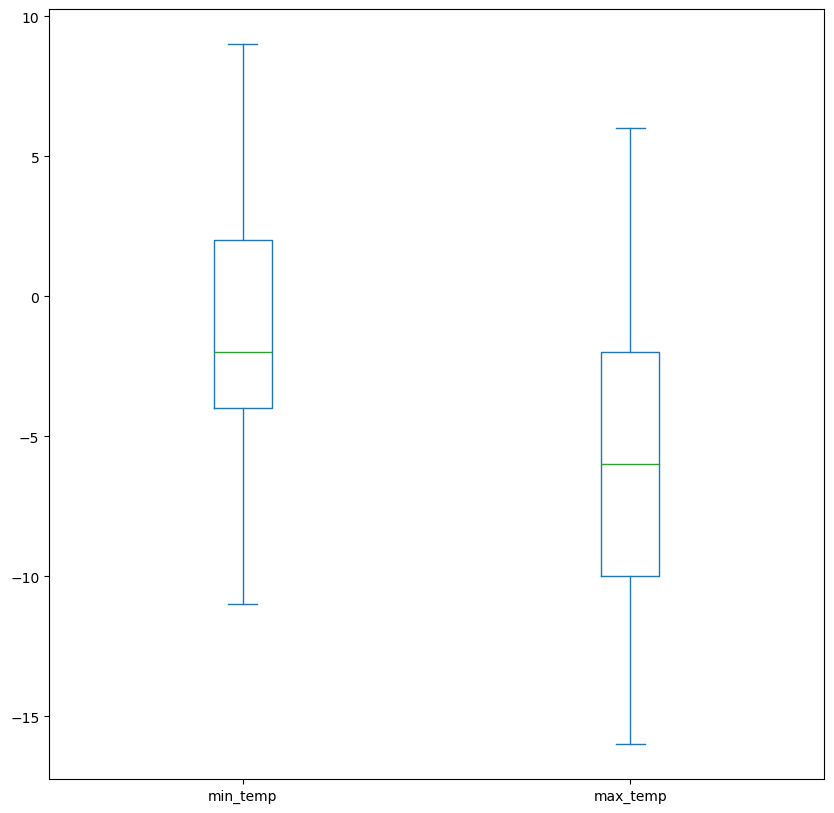

In [7]:
# create a side-by-side boxplot of chicago's minimun and maximum temperatures in February and March?
(
    df
    .loc[df.index.month_name().isin(["February", "March"])]
    .plot.box(figsize=(10, 10))
)

In [8]:
# read the data from los angles and boston
# create a single dataframe from the three cities
all_dfs = [df]
filenames = ["/Users/ahmedabukar/Downloads/:/data/los+angeles,ca.csv",
            "/Users/ahmedabukar/Downloads/:/data/boston,ma.csv"]
for filename in filenames:
    all_dfs.append(load_data(filename))

df = pd.concat(all_dfs)
df.sample(20)

,min_temp,max_temp,city
date_time,,,
2019-01-04 15:00:00,18,7,Los Angeles
2019-01-25 18:00:00,22,11,Los Angeles
2019-01-23 03:00:00,5,-3,Boston
2019-01-12 21:00:00,-3,-9,Boston
2018-12-31 06:00:00,2,-1,Chicago
2019-01-13 06:00:00,16,9,Los Angeles
2019-03-08 00:00:00,15,11,Los Angeles
2019-01-02 21:00:00,2,-4,Boston
2019-02-11 00:00:00,2,-3,Boston


In [9]:
# get the descriptive statistics for mintemp and maxtemp per city?
(
    df
    .groupby("city")
    .describe()
)

min_temp                                                     \
               count       mean       std   min   25%   50%   75%   max   
city                                                                      
Boston         728.0   2.868132  4.945277 -12.0   0.0   2.0   6.0  17.0   
Chicago        728.0  -0.736264  6.128985 -25.0  -3.0   0.0   3.0   9.0   
Los Angeles    728.0  17.054945  2.708640  12.0  15.0  16.0  19.0  23.0   

            max_temp                                                    
               count       mean       std   min  25%   50%   75%   max  
city                                                                    
Boston         728.0  -3.142857  4.957195 -14.0 -6.0  -3.0   0.0   9.0  
Chicago        728.0  -5.076923  6.255857 -28.0 -9.0  -4.0  -1.0   6.0  
Los Angeles    728.0  10.637363  2.705200   4.0  9.0  11.0  12.0  17.0

max_temp       Axes(0.125,0.11;0.352273x0.77)
min_temp    Axes(0.547727,0.11;0.352273x0.77)
dtype: object

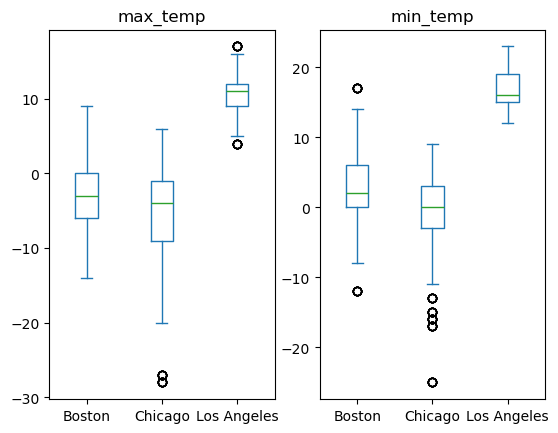

In [11]:
# create side-by-side boxplot showing minimum and maximum temperatures for each city?
(
    df
    .plot.box(by="city")
)

In [12]:
filenames.append("/Users/ahmedabukar/Downloads/:/data/chicago,il.csv")
all_dfs = [load_data(filename) for filename in filenames]
df = pd.concat(all_dfs)
df

,min_temp,max_temp,city
date_time,,,
2018-12-11 00:00:00,20,14,Los Angeles
2018-12-11 03:00:00,20,14,Los Angeles
2018-12-11 06:00:00,20,14,Los Angeles
2018-12-11 09:00:00,20,14,Los Angeles
2018-12-11 12:00:00,20,14,Los Angeles
...,...,...,...
2019-03-11 09:00:00,3,-2,Chicago
2019-03-11 12:00:00,3,-2,Chicago
2019-03-11 15:00:00,3,-2,Chicago


In [14]:
# for each city, calculate the mean and medium for min_temp and max_temp.
# are they same (or even close) if they're different, in which direction are they pulled?
# its pulled up due to some high temp 
(
    df
    .groupby("city")
    .agg(["mean", "median"])
)

min_temp          max_temp       
                  mean median       mean median
city                                           
Boston        2.868132    2.0  -3.142857   -3.0
Chicago      -0.736264    0.0  -5.076923   -4.0
Los Angeles  17.054945   16.0  10.637363   11.0

city
Boston         Axes(0.125,0.11;0.775x0.77)
Chicago        Axes(0.125,0.11;0.775x0.77)
Los Angeles    Axes(0.125,0.11;0.775x0.77)
Name: min_temp, dtype: object

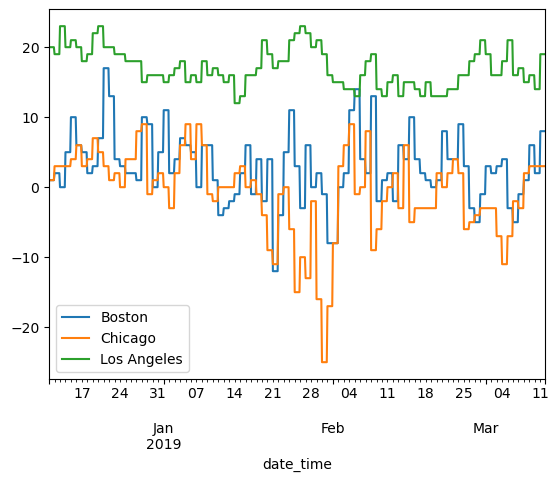

In [23]:
# create a line plot showing the minimum temperature in each city. 
# the x axis should show dates, y axis should show temperatures 
# and each line should represent a different city?
(
    df
    .groupby("city")
    ["min_temp"]
    .plot
    .line(legend=True)
)